#  <center> A Complete Guide to K-Nearest Neighbours </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is the K-Nearest Neighbour?
    - 1.2 How does the K-Nearest Neighbour work?
        
        
- [2. How does it find the neighbours?](#2)
    - 2.1 Distance Formulas
    - 2.2 Data Normalization
    - 2.3 Encoding Categorical Variables
    - 2.4 How many closest neighbours?
    - 2.5 The curse of dimensionality


- [3. Example: Titanic Survival Prediction](#4)
    - 4.1 Data Preparation
    - 4.2 Tuning hyperparameters
    - 4.3 Making predictions

Have a look at these notebooks if you want to learn about:

1. **Linear Regression**: [A Complete Guide to Linear Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-linear-regression)
2. **Regularized Regression**: [A Complete Guide to Regularized Regressions](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-regularized-regressions)
3. **Logistic Regression**: [A Complete Guide to Logistic Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-logistic-regression)
4. **Support Vector Machine**: [A Complete Guide to Support Vector Machine](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)
5. **Decision Trees & Tree Ensembles**: [A Complete Guide to Decision Trees & Ensembles](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-decision-trees-ensembles)
6. **Naive Bayes**: [A Complete Guide to Naive Bayes Classifiers](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-naive-bayes-classifiers)

<a id="1"></a>

# <center>Introduction</center>

## What is the K-Nearest Neighbours?

**`K-Nearest Neighbours`** is an algorithm that can be used for both **classification** and **regression** problems which assumes that **similar inputs** lead to **similar outputs**. 

More specifically, it relys on the central idea that data points with **similar attributes** (input variable X) tend to fall into **similar categories** or have **similar values** (output variable Y). For example, food with similar **sweetness** and **crunchiness** values are likely to be of the same types:

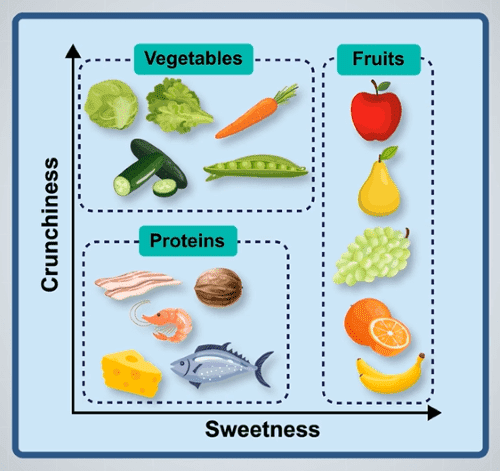

Under such an assumption, the **K-Nearest Neighbours** algorithm finds the **k closest neighbours** of a data point and **classifies** this point to the **same category** of its neighbours.

## How does the K-Nearest Neigbours work?

Suppose we have a data point representing **tomatoes** and we find that the **k=3** closest neighbours are **oranges**, **grapes** and **nuts**. Since 2 out of the 3 closest neighbours are **fruits**, the K-Nearest Neighbours algorithm will classify tomatoes as fruit.

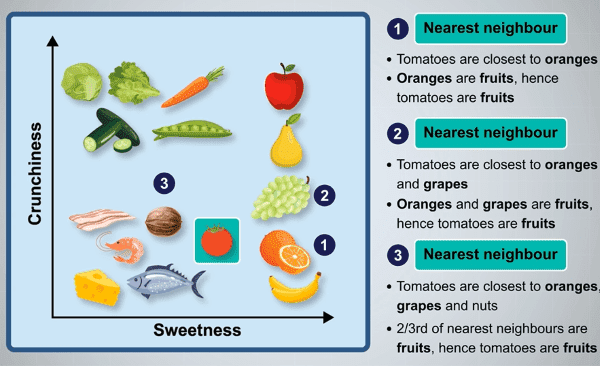

As shown in the above example, the **K-Nearest Neighbours** algorithm takes the **majority class** as the **classification** output. When dealing with **regression** problems, the algorithm calculates the **average value** of the neighbours as the output.

We now understand how **K-Nearest Neighbours** works intuitively, but how exactly does it **find the closest neighbours** of a data point? In other words, how does it **measure the distances** between data points?

<a id="2"></a>

# <center>How does it find the neighbours?</center>

## Distance Formulas

There are **3 common ways** to calculate the **distance** between two data points:

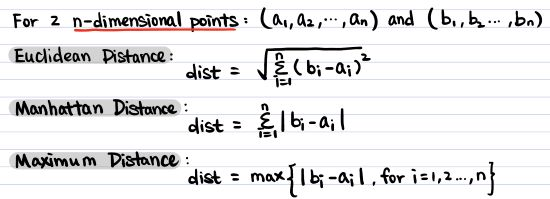

Let's get some visualizations on these **distances**:

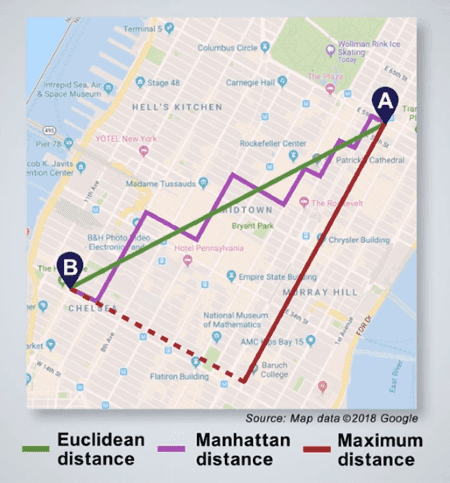

As shown in the above formulas, we can see that for an **n-dimensional** data point, all **n features** are used in the calculations of the distances. This leads to a problem: what if one of the features has very **large values** and another one takes on **small values**, for example **height** and **income** of a customer.

The differences between 2 data points in **income** will always be much larger than that in **height**. Does it mean that **income** is a more important feature? 

The answer is no! To avoid this from happening, we have to **normalize** the data before it can be used to calculate the distances.

## Data Normalization

Generally, there are **2 normalization methods**:

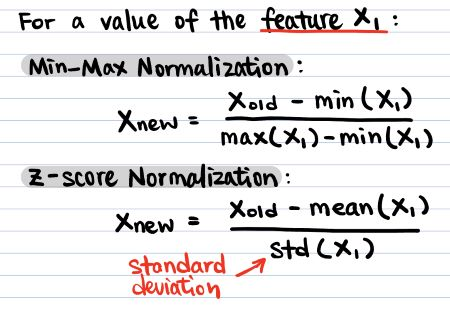

The **`Min-Max Normalization`** typically works well when the feature is roughly **uniformly distributed**. On the other hand, the **`Z-Score Normalization`** is better when there are **outliers** in the feature values. In other words, the second method works well when the feature values more resemble a **normal distribution**.

## Encoding Categorical Variables

Both **calculating distances** and **normalizing values** can only be done when the input variables are **numerical**. What if we have **categorical** input variables?

We encode it! **Encoding** means replacing the **categories** of a categorical variable with **dummy numerical values**. Let's have a look at an example of how the features **gender** and **temperature** can be encoded in **different ways**:

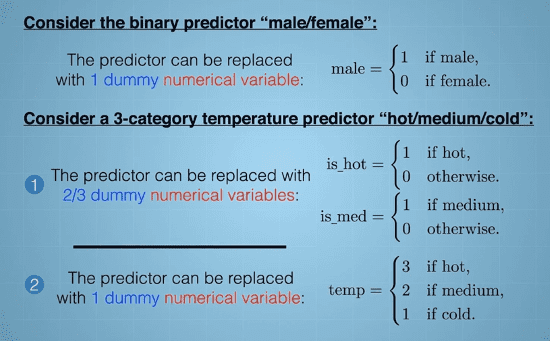

After **encoding** all the categorical variables and **normalizing** the values, we can calculate the **distances** between the data points and therefore find the **closest neighbours**. But **how many** of these closest neighbours should we use to classify a new data point?

## How many closest neighbours?

There is a **trade-off** when choosing the **k** value.

A model can take on a **high k** value and considers **a lot of neighbours**. In this case, the model is likely to experience **underfitting**. As demonstrated in the below diagram (k=99), **underfitting** means that the model has a high **bias** and is **under-performing**.

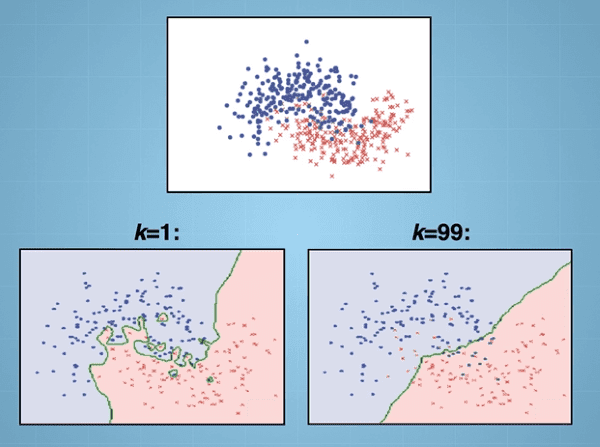

Conversely, if the model takes a **low k** value (k=1), it becomes **highly dependent** on the training data. In this case, the model will have a **high variance** and is likely to experience **overfitting**. How can we find on the **best k** value then? 

We have to use **cross-validation** and find the **optimal k** value that balance the **bias-variance trade-off**:

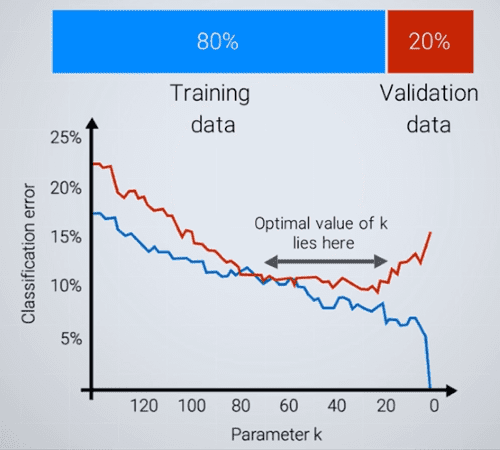

## The Curse of Dimensionality

The **K-Nearest Neighbours** algorithm faces a big problem when deal with **high-dimensional** data points. We call this the **`curse of dimensionality`**.

In **high dimensions**, data points experience the following even if they are **uniformly distributed**:

1. The **closest** data points are **far away** from each other
2. Data points cluster at the **corners** of the space

The **first curse** sounds very contradictive, let me show what it means with an example. Suppose we have **5000 p-dimensional** data points and the feature values are **normalized** to the range **[0,1]**. Asssume these data points are **uniformly distributed** within a **hypercube of length 1**.

Now, we want to find the **5 closest neighbours** to any particular point. This is equivalent to finding the **smallest cube** that covers **1/1000 of the volume** of the hypercube. We know the **volumne of the big hypercube is 1** and the volume of a small hypercube with **side length (c)** can be calculated as **$c^{p}$** . Therefore, the **side length (c)** of the hypercube we are looking for can be computed as:

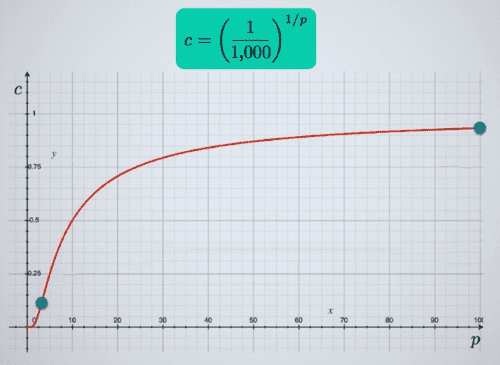

As shown above, the **side length (c)** of the hypercube that contains the **5 closest neighbours** gets larger as the **dimension (p)** increases. The larger the hypercube needed, further away the closest neighbours are. Let's visualize this:



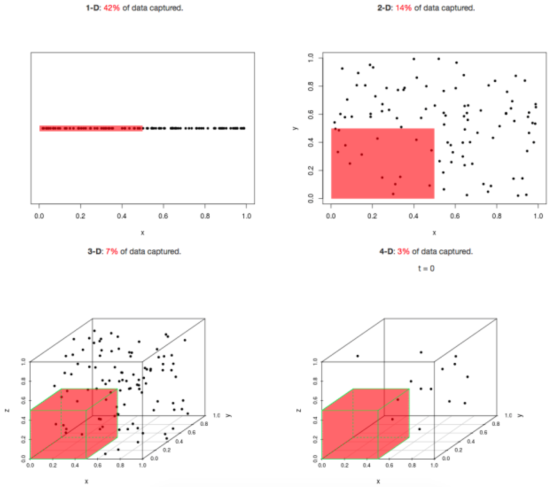

Image Source: https://eranraviv.com/curse-of-dimensionality/

What about the **second curse**? What does **clustering at the corners** mean?

Let me explain this with another example: suppose we have data points **uniformally distributed** within an **orange**. Then we take **tiny step (ε)** from the outer shell inwards. Now we can calculate the **outer volumne** and the **inner volume** seperated by this **ε** as below:

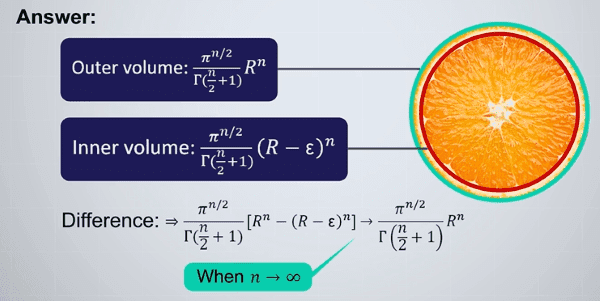

AS demonstrated above, we take the **difference** in the two volumes. As the **dimensionality (n)** of the data points **increases** towards infinity, the difference in volumes tends to become the outer volume (the **original size** of the orange). In other words, there will be **nearly no volume** within the inner shell as **dimensionality** increases. Given the data points are **uniformly distributed**, most of them will be living in a **very thin shell** away from the centre.

With these curses, a simple **K-Nearest Neighbours** algorithm will no longer work with **high-dimensional** and **uniformly distirbuted** features. To overcome this problem, **much more training data** will be required when we have **high-dimensional features**.

<a id="3"></a>

# <center>Example: Titanic Survival Prediction</center>

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV

### Import Data

In [35]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

### Data Preprocess

In [36]:
#missing values
df_train = df_train.dropna(subset=['Embarked'])
df_train['Age'].fillna(round(df_train['Age'].dropna().mean()), inplace=True)
df_test['Age'].fillna(round(df_test['Age'].dropna().mean()), inplace=True)

#feature engineering: family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_train['Alone'] = df_train['FamilySize'].map({1:1})
df_train['Alone'].fillna(0, inplace=True)
df_test['Alone'] = df_test['FamilySize'].map({1:1})
df_test['Alone'].fillna(0, inplace=True)

#feature engineering: age band
bins = [0, 15, 30, 60, 81]
labels = [0, 1, 2, 3]
df_train['AgeBand'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['AgeBand'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

#feature engineering: fare band
bins = [0, 8, 14, 31, 513]
labels = [0, 1, 2, 3]
df_train['FareBand'] = pd.cut(df_train['Fare'], bins=bins, labels=labels, right=False)
df_test['FareBand'] = pd.cut(df_test['Fare'], bins=bins, labels=labels, right=False)

#normalization
num_features = ['Pclass','AgeBand', 'FareBand', 'FamilySize']
scaler = StandardScaler()
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.transform(df_test[num_features])

#encode categorical variables
df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1, 'female':0})
df_train = pd.get_dummies(df_train, columns= ['Embarked'])
df_test = pd.get_dummies(df_test, columns= ['Embarked'])
df_train.drop(columns=['Embarked_S'], inplace=True)
df_test.drop(columns=['Embarked_S'], inplace=True)

#create datasets for modelling
X_train = df_train.drop(columns=['Survived','Name','Age','SibSp','Parch','Fare','PassengerId','Ticket','Cabin'])
y_train = df_train['Survived']
X_test = df_test.drop(columns=['Name','Age','SibSp','Parch','Fare','Ticket','PassengerId','Cabin'])

### K-Nearest Neighbours Classifier

There are **3 key hyperparameters** of the model we need to tune:

1. **`n_neighbors`**: the number of neighbours to use
2. **`p`**: euclidean distance (p=2), manhattan distance (p=1)
3. **`weights`**: whether to weight the neighbours uniformly or to the inverse of the distance

In [37]:
#tune the hyperparameters
KNN = KNeighborsClassifier()
KNN_param = {'n_neighbors': np.arange(2,11),
             'p': [1,2],
             'weights': ['uniform','distance']}
KNN_cv = GridSearchCV(estimator=KNN, param_grid=KNN_param , scoring='accuracy', cv=5)
KNN_cv.fit(X_train, y_train)
KNN_cv.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [38]:
#cross-validation
KNN_best = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform')
cv_results = cross_validate(KNN_best, X_train, y_train, scoring='accuracy', cv=5)
cv_results['test_score'].mean()

0.82228781819336

In [45]:
#make predictions
KNN_best.fit(X_train, y_train)
y_pred = KNN_best.predict(X_test)
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = y_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
